In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from scipy.stats import pearsonr

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas          1.1.4
numpy           1.19.5
seaborn         0.11.1
statsmodels.api 0.12.2



/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_dag_train = pd.read_csv("../results/dag.prediction.train.response.updated.csv", sep="\t")
df_dag_train_warp = pd.read_csv("../results/dag.prediction.train.response.warp.updated.csv", sep="\t")
df_train = pd.read_csv("../data/train.txt", index_col=0, header = 0, sep="\t")
df_train_warp = pd.read_csv("../data/train.warp.txt", index_col=0, header = 0, sep="\t")
df_test = pd.read_csv("../data/test.txt", index_col=0, header = 0, sep="\t")
df_test_warp = pd.read_csv("../data/test.warp.txt", index_col=0, header = 0, sep="\t")

# df_train.columns = [col.replace(" ", "_").replace(";", ".") for col in df_train.columns]

In [53]:
df_results_warp = pd.read_csv("../data/results.dbn.warp.txt", sep="\t")
df_results_model = pd.read_csv("../data/results.dbn.txt", sep="\t")

In [54]:
df_results_warp["squared_error"] = np.square((df_results_warp["truth"] - df_results_warp["model"])) - np.square(df_results_warp["truth"] - df_results_warp["baseline"])

In [55]:
df_results_warp.groupby("taxon").mean().sort_values("squared_error")

,baseline,model,truth,squared_error
taxon,,,,
day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia_A.o__Christensenellales.f__CAG_917.g__CAG_475.s__CAG_475_sp000434435,-5.908071,-6.173919,-6.250280,-14.404141
day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Oscillospiraceae.g__CAG_83.s__CAG_83_sp000435555,-1.070537,-0.706051,-1.692886,-10.254581
day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Blautia.s__Blautia_sp900541955,-6.099213,-6.118317,-6.424958,-9.379292
day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Ruminococcaceae.g__UBA1394.s__UBA1394_sp900538575,-5.338726,-5.989603,-5.906037,-8.656137
day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_267.s__CAG_267_sp001917135,-4.864353,-5.002527,-5.423629,-5.924832
day_plus_one.tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__UBA11471.g__UBA11471.s__UBA11471_sp000434215,-4.356203,-4.641486,-4.556468,-5.796546
day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__CAG_272.g__CAG_448.s__CAG_448_sp003150135,-5.872818,-5.744129,-5.786489,-5.740431
day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Agathobacter.s__Agathobacter_sp000434275,-4.579898,-4.538316,-4.187231,-5.661510
day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125,-5.796917,-5.842960,-5.757972,-5.487215


In [67]:
baseline = np.square(df_results_model["truth"] - df_results_model["baseline"])
warp = np.square(df_results_warp["truth"] - df_results_warp["model"])
model = np.square(df_results_model["truth"] - df_results_model["model"])

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
df_results = pd.DataFrame([baseline, warp, model], index=["Baseline", "DBN", "DBN Warp"]).T
df_results_tall = df_results.melt(value_vars=["Baseline", "DBN", "DBN Warp"])

In [69]:
# perform Tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_results_tall['value'],
                          groups=df_results_tall['variable'],
                          alpha=0.05)

In [70]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Baseline,DBN,-3.233,0.0012,-5.3718,-1.0941,True
Baseline,DBN Warp,-3.213,0.0013,-5.3518,-1.0741,True
DBN,DBN Warp,0.02,0.9,-2.1188,2.1589,False


/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


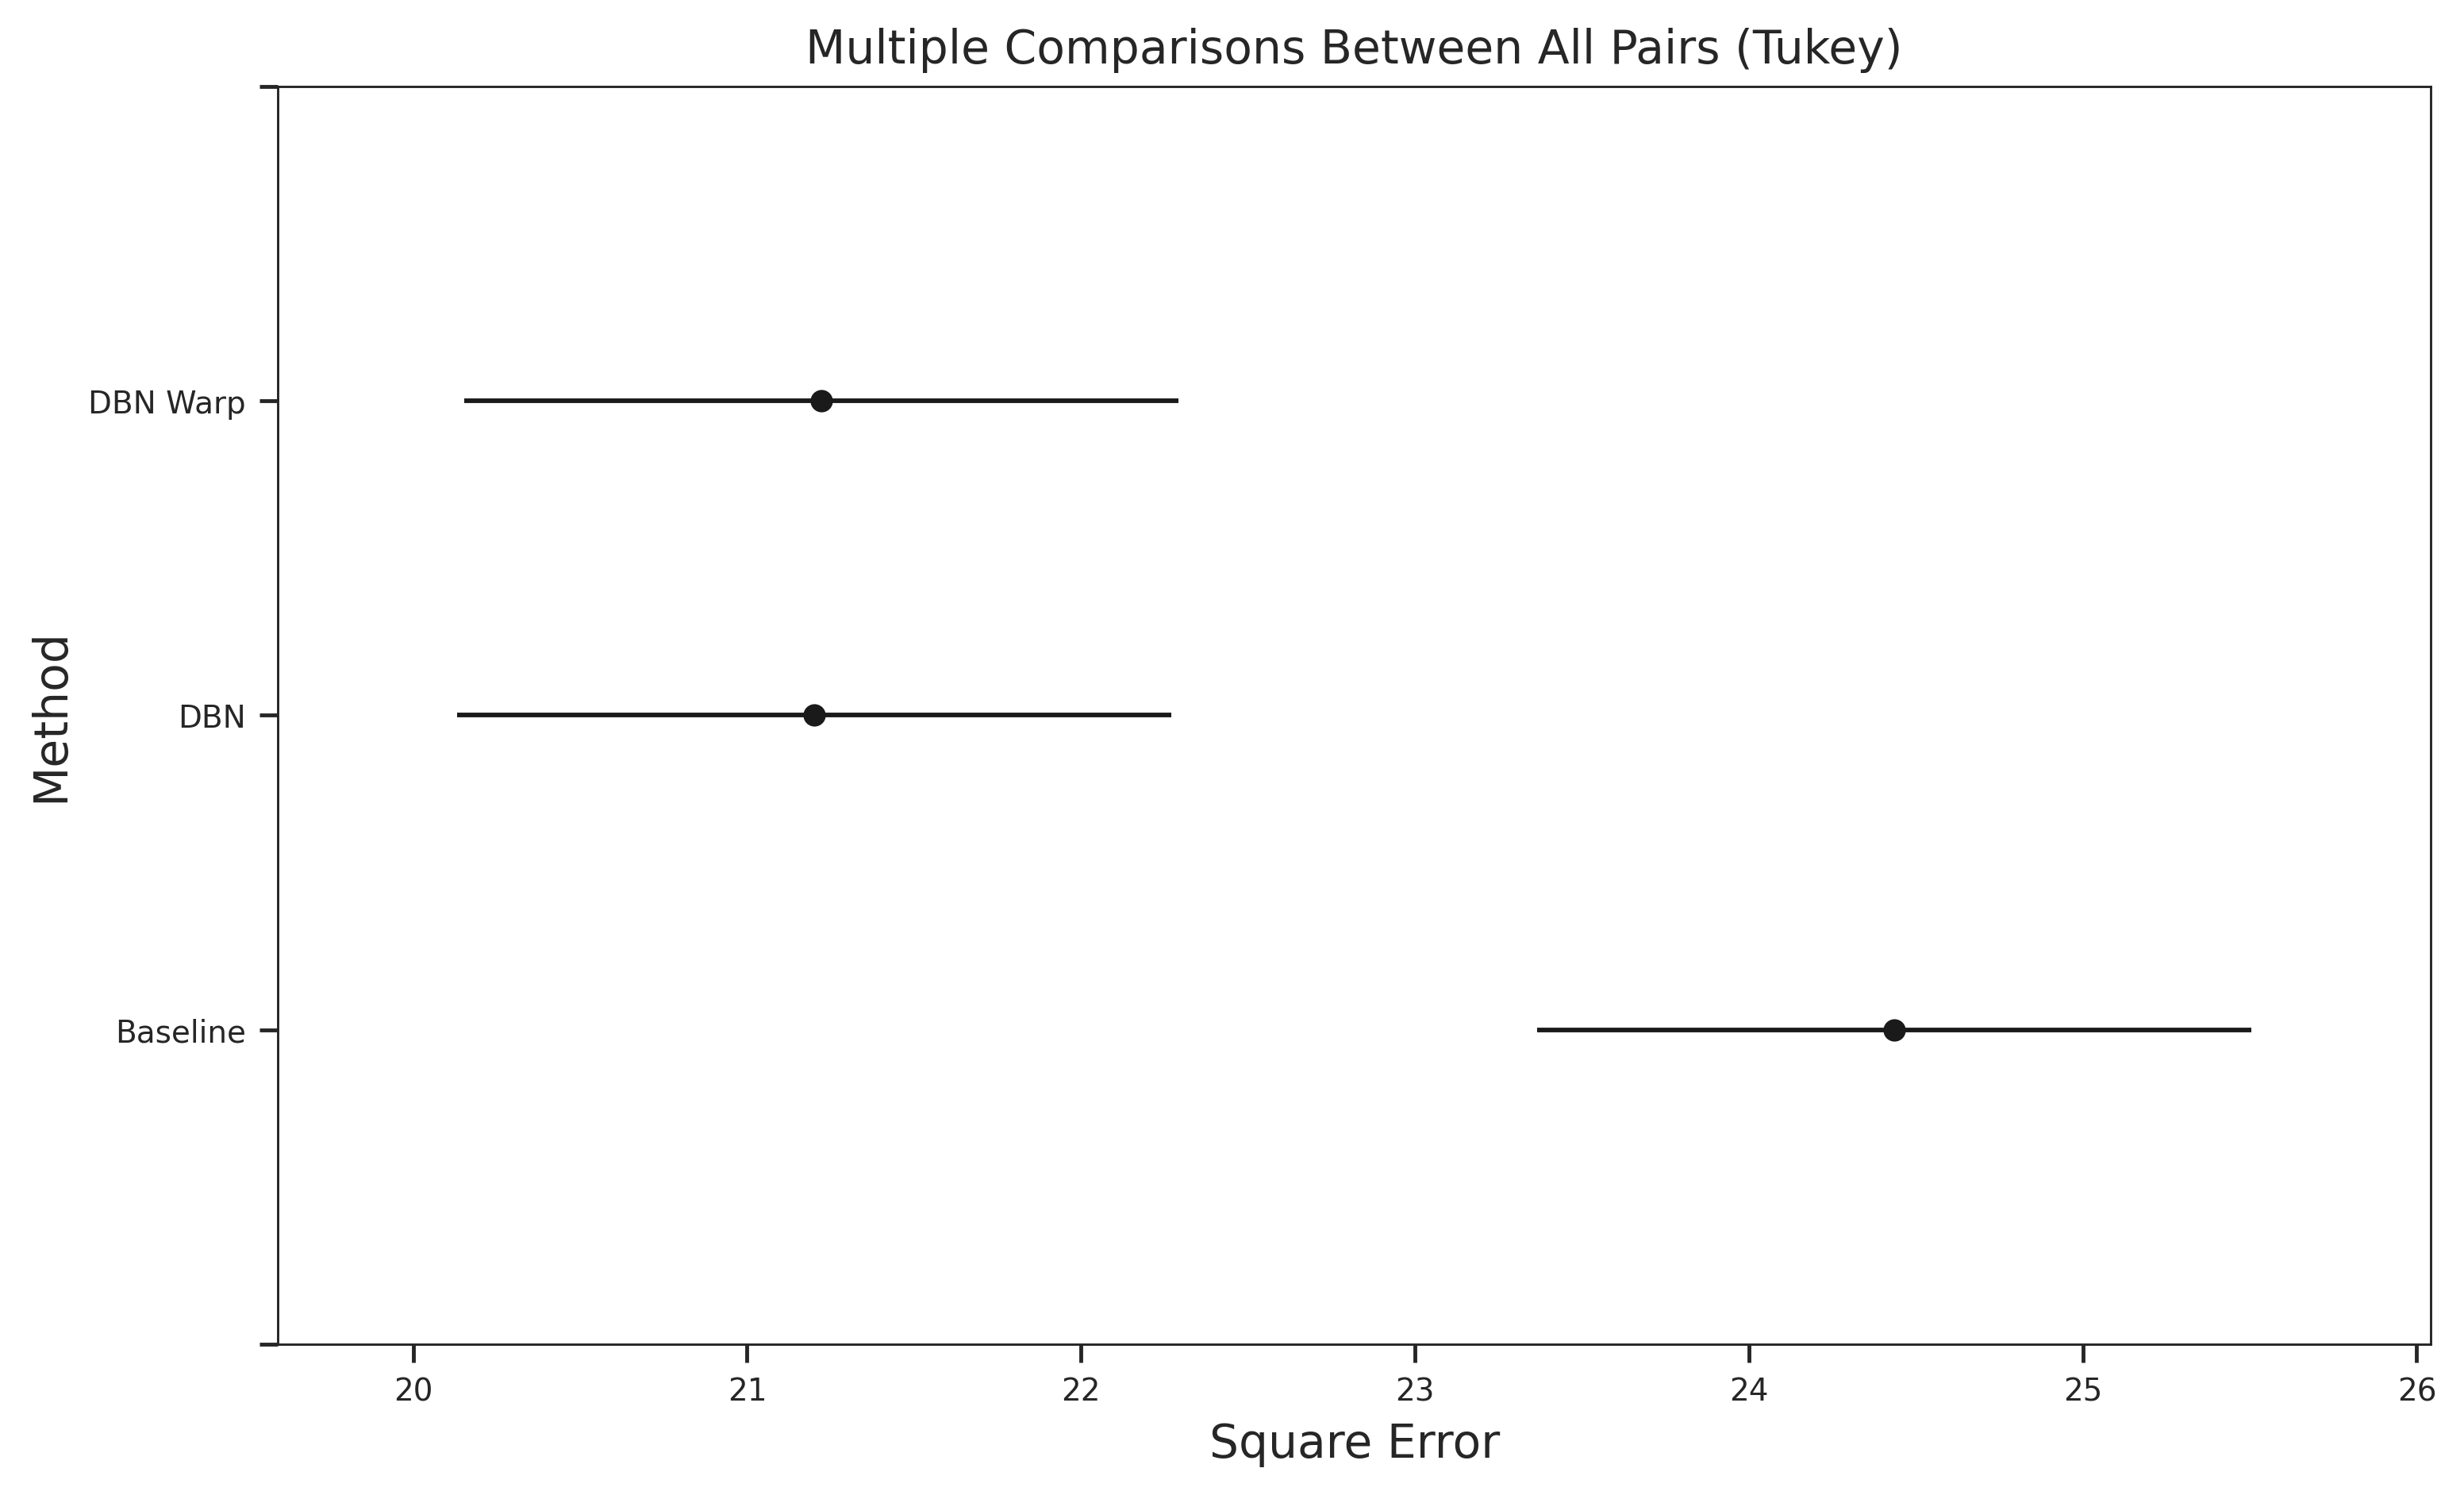

In [71]:
import plot_utils as pu
pu.figure_setup()
figsize = pu.get_fig_size(6.5 / 2)

fig, ax = plt.subplots(figsize=figsize)
tukey.plot_simultaneous(ax=ax, xlabel="Square Error", ylabel="Method")
pu.save_plot(fig, "tukey")

In [61]:
df_dag_train_warp

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,StudyDayNo,tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum,tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum,tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp003447235,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp900313215,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Barnesiellaceae.g__Barnesiella.s__Barnesiella_sp003150885,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_ihumii,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_indistinctus,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_sp900240235,...,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_267.s__CAG_267_sp001917135,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_495.s__CAG_495_sp000436375,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_495.s__CAG_495_sp001917125,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_495.s__CAG_495_sp900540425,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Mesosutterella.s__Mesosutterella_massiliensis,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Sutterella.s__Sutterella_wadsworthensis,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Sutterella.s__Sutterella_wadsworthensis_A,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacterales.f__Enterobacteriaceae.g__Escherichia.s__Escherichia_coli,day_plus_one.tax.k__Bacteria.p__Verrucomicrobiota.c__Verrucomicrobiae.o__Verrucomicrobiales.f__Akkermansiaceae.g__Akkermansia.s__Akkermansia_muciniphila,day_plus_one.tax.k__Bacteria.p__Verrucomicrobiota.c__Verrucomicrobiae.o__Verrucomicrobiales.f__Akkermansiaceae.g__Akkermansia.s__Akkermansia_muciniphila_B
StudyDayNo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp003447235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Sutterella.s__Sutterella_wadsworthensis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Sutterella.s__Sutterella_wadsworthensis_A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacterales.f__Enterobacteriaceae.g__Escherichia.s__Escherichia_coli,0,0